<a href="https://colab.research.google.com/github/MateusGheorghe/LAMP/blob/master/Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [ ]:
import os
os.chdir("/gdrive/My Drive/MESTRADO/Artigo NDTE/Resultados 2020")

In [ ]:
!ls

 CLEAN
 Dataset_Images_Experimental_AmplitudeCorrectionOnly.dat.npy
 Dataset_Images_Experimental_NoTreatment.dat.npy
 Dataset_Images_Experimental_PhaseShiftAndAmplitudeCorrection.dat.npy
 Dataset_Images_Experimental_PhaseShiftOnly.dat.npy
 Dataset_Images_Simulated.pickle
 Experimental_Data_Compiled_AmplitudeCorrectionOnly.pickle
 Experimental_Data_Compiled_NoTreatment.pickle
 Experimental_Data_Compiled_PhaseShiftAndAmplitudeCorrection.pickle
 Experimental_Data_Compiled_PhaseShiftOnly.pickle
 Experimental_Dataset_AmplitudeCorrectiontOnly.pickle
 Experimental_Dataset_NoTreatment.pickle
 Experimental_Dataset_PhaseAndAmplitudeCorrected.pickle
 Experimental_Dataset_PhaseShiftOnly.pickle
 QUASI_RAW-SeparationInTransmission
 RAW-NoModeSeparation
'Resultados Finais Artigo'
 Results_Raw_Classification.mat
 Results_Raw_LinearDiscriminant.mat
 Results_Raw_LinearRegression.mat
 Results_Raw_Top_Regression.mat
 Simulated_Data_Compiled.pickle
 Simulated_Dataset.pickle
 TESTE_Models_Kfold_10_Combinati

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [ ]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print ('\nElapsed time is ')
        print (str(time.time() - startTime_for_tictoc))
        print('seconds.\n')
    else:
        print ('\nToc: start time not set\n')

In [ ]:
def TIC():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc1
    startTime_for_tictoc1 = time.time()

def TOC():
    import time
    if 'startTime_for_tictoc' in globals():
        print ('\nElapsed time is ')
        print (str(time.time() - startTime_for_tictoc1))
        print('seconds.\n')
    else:
        print ('\nToc: start time not set\n')

# Loading Files



In [ ]:
TIC()

**Loading Experimental Data**

In [ ]:
with open('Experimental_Data_Compiled_PhaseShiftAndAmplitudeCorrection.pickle', 'rb') as filename:
# with open('Experimental_Data_Compiled_AmplitudeCorrectionOnly.pickle', 'rb') as filename:
# with open('Experimental_Data_Compiled_PhaseShiftOnly.pickle', 'rb') as filename:
# with open('Experimental_Data_Compiled_NoTreatment.pickle', 'rb') as filename:
    X_exp,Area_exp,Ang_exp,Depth_exp,Classes_exp,Categories_exp,P1_exp,P2_exp,P3_exp,P4_exp,P5_exp,P6_exp,P7_exp,P8_exp = pickle.load(filename)

**Loading Simulated Data**

In [ ]:
with open('Simulated_Data_Compiled.pickle', 'rb') as filename:
    X_sim,Area_sim,Ang_sim,Depth_sim,Classes_sim,Categories_sim,P1_sim,P2_sim,P3_sim,P4_sim,P5_sim,P6_sim,P7_sim,P8_sim = pickle.load(filename)

Data Information
* X -> Matrix with data of all the patches concatenated (P1,...,P8)
* Area -> Target for regression
* Ang -> Angle for each sample
* Depth - > Depth for each sample
* Classes -> Three classes based on severity (0, 1 and 2)
* Categories -> Three classes based on severity (Low, Median and High)
* P1,P2,P3,...,P8 -> Patch 1, Patch 2, ..., Patch 8 (Patches used to extract features, please refer to the Measurement paper).


* Simulated Data _sim
* Experimental Data _exp
**   PhaseShiftAndAmplitudeCorrection - Correção de fase e amplitude
**   AmplitudeCorrectionOnly - Correção de amplitude apenas
**   PhaseShiftOnly - Correção de fase apenas
* *   NoTreatment - Nenhum tratamento aplicado aos dados





Plotting samples of Simulated Data

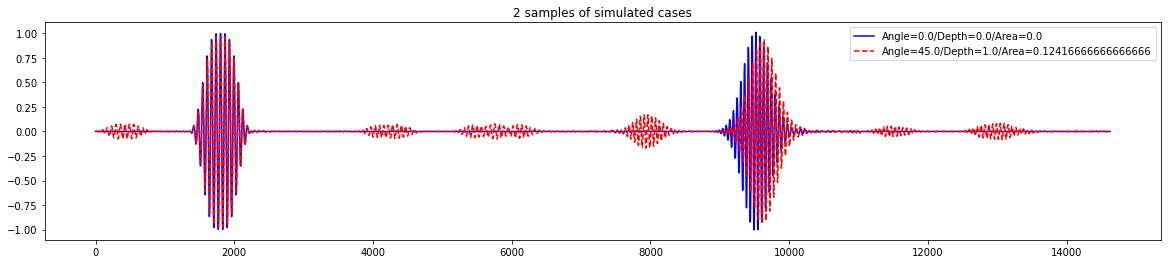

In [ ]:
Caso1=0
Caso2=1000
fig = plt.figure(figsize=(20,4))
plt.plot(X_sim[Caso1,:],color='blue',label='Angle='+str(Ang_sim[Caso1])+'/Depth='+str(Depth_sim[Caso1])+'/Area='+str(Area_sim[Caso1]))
plt.plot(X_sim[Caso2,:],color='red',linestyle='dashed',label='Angle='+str(Ang_sim[Caso2])+'/Depth='+str(Depth_sim[Caso2])+'/Area='+str(Area_sim[Caso2]))
plt.title('2 samples of simulated cases')
plt.legend()


Elapsed time is 
1.8950483798980713
seconds.



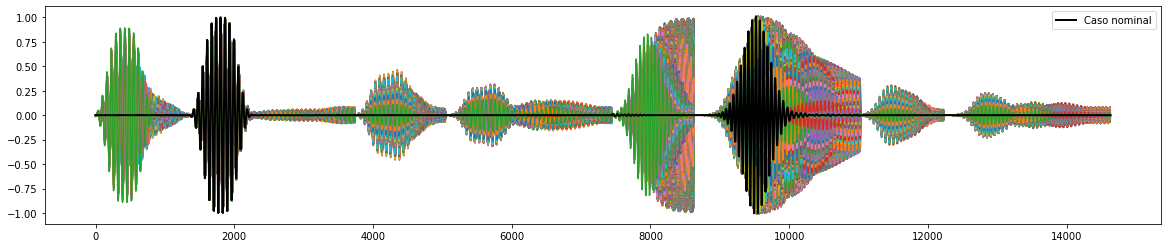

In [ ]:
tic()
fig = plt.figure(figsize=(20,4))
for i in range(1,1234):
  plt.plot(X_sim[i,:])
plt.plot(X_sim[0,:],color='black',label='Caso nominal',linewidth=2)
plt.legend()
toc()

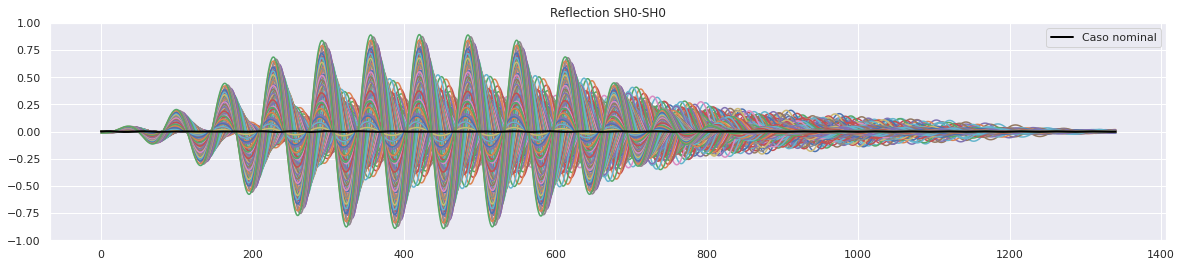

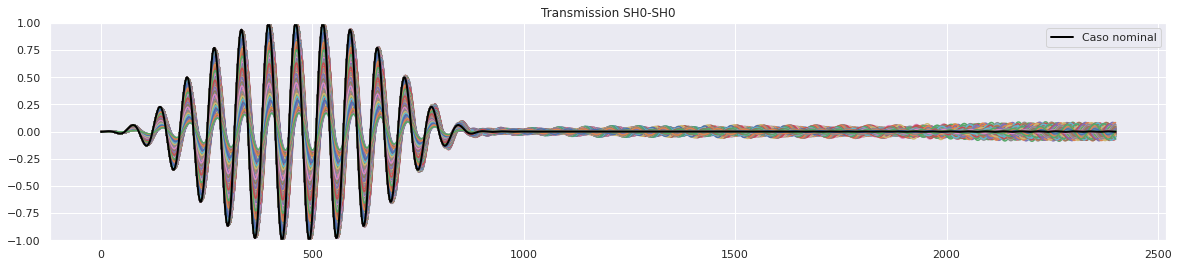

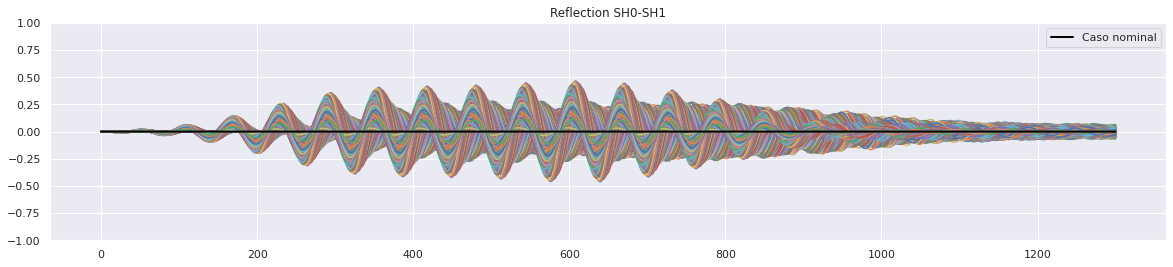

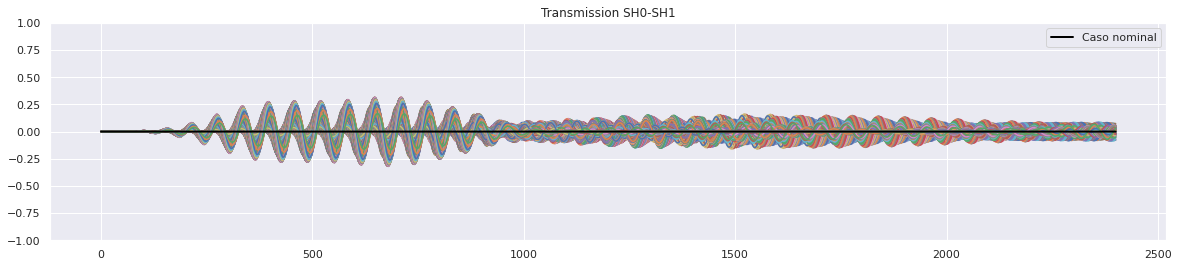

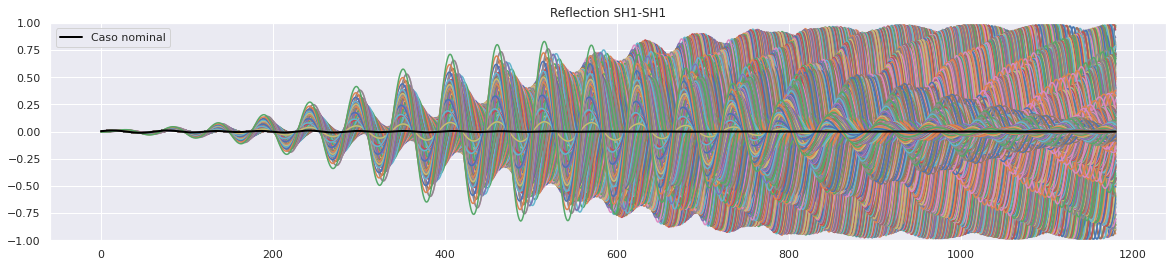

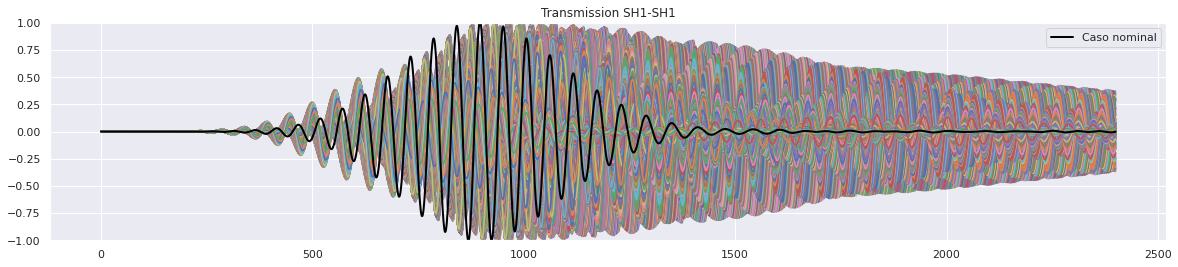

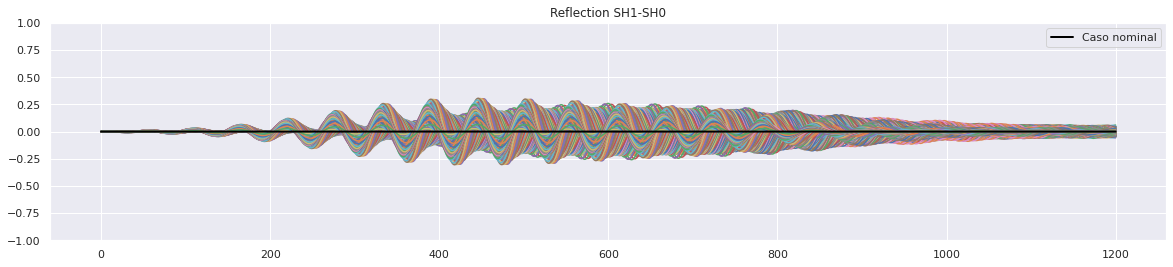

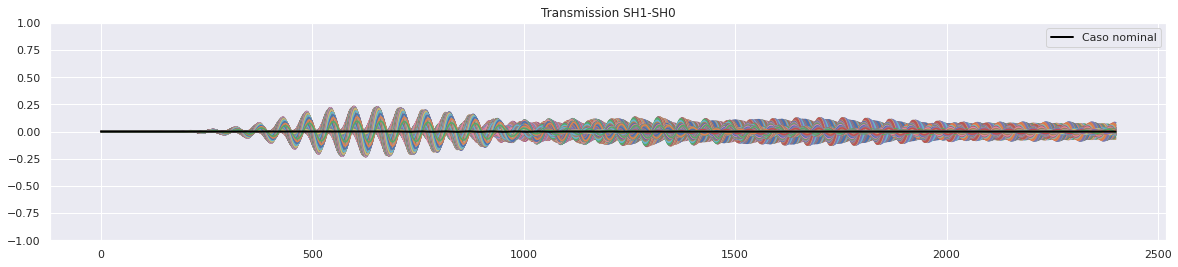

In [ ]:
fig = plt.figure(figsize=(20,4))
for i in range(1,1234):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P1_sim[i]);plt.title('Reflection SH0-SH0');
plt.plot(P1_sim[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,1234):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P2_sim[i]);plt.title('Transmission SH0-SH0');
plt.plot(P2_sim[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,1234):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P3_sim[i]);plt.title('Reflection SH0-SH1')
plt.plot(P3_sim[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,1234):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P4_sim[i]);plt.title('Transmission SH0-SH1')
plt.plot(P4_sim[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,1234):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P5_sim[i]);plt.title('Reflection SH1-SH1')
plt.plot(P5_sim[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,1234):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P6_sim[i]);plt.title('Transmission SH1-SH1')
plt.plot(P6_sim[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,1234):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P7_sim[i]);plt.title('Reflection SH1-SH0')
plt.plot(P7_sim[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,1234):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P8_sim[i]);plt.title('Transmission SH1-SH0')
plt.plot(P8_sim[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()

Plotting samples of experimental data

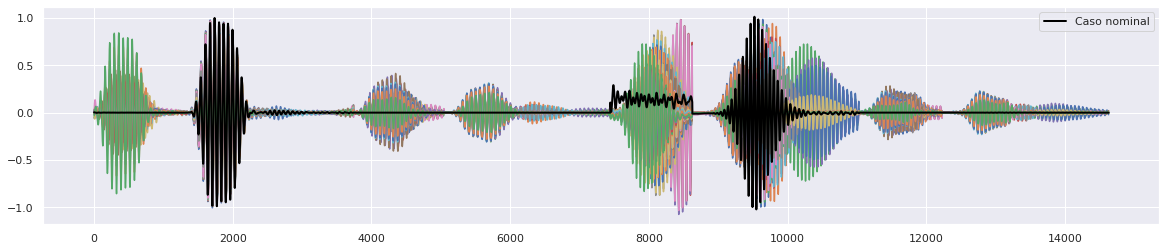

In [ ]:
fig = plt.figure(figsize=(20,4))
for i in range(1,34):
  plt.plot(X_exp[i,:])
plt.plot(X_exp[0,:],color='black',label='Caso nominal',linewidth=2)
plt.legend()

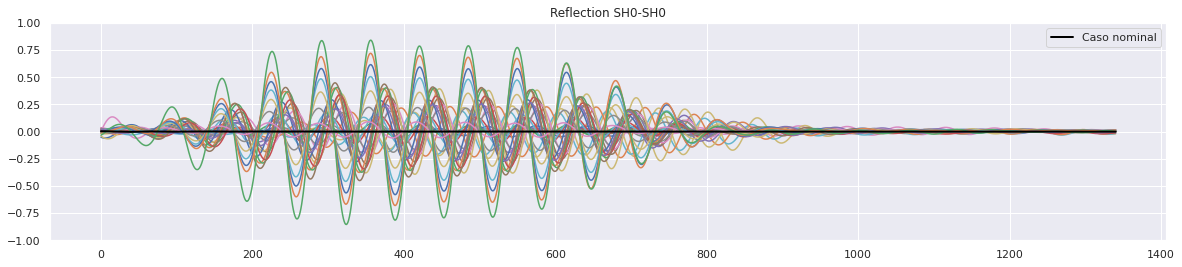

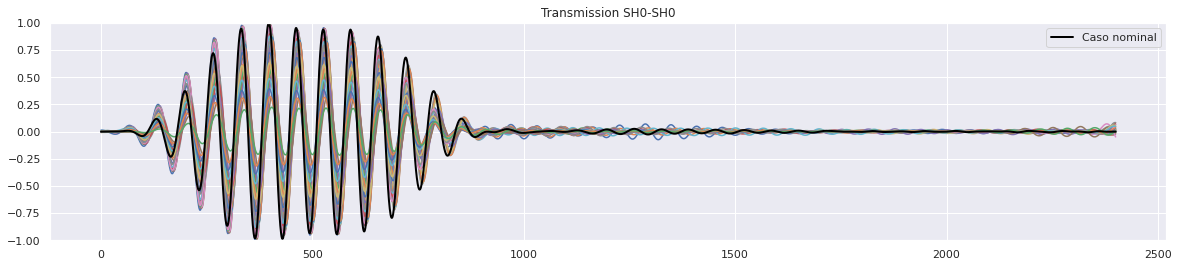

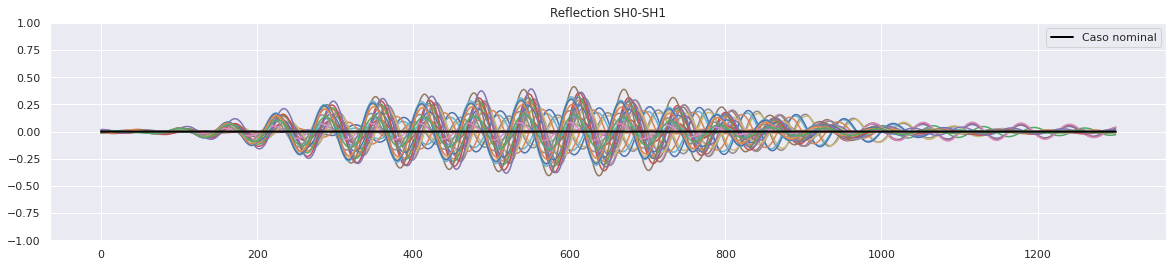

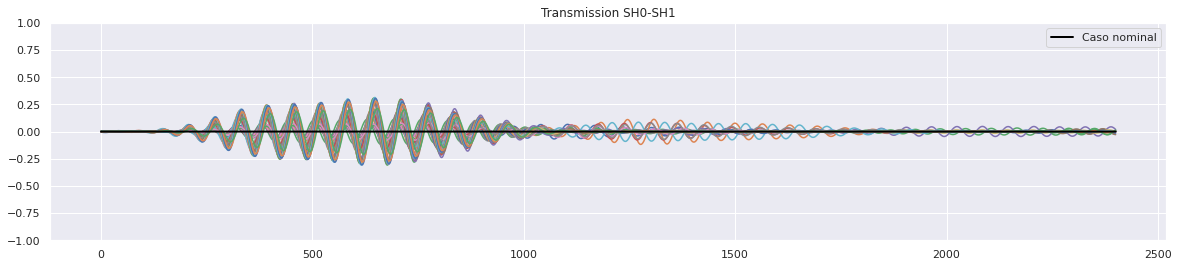

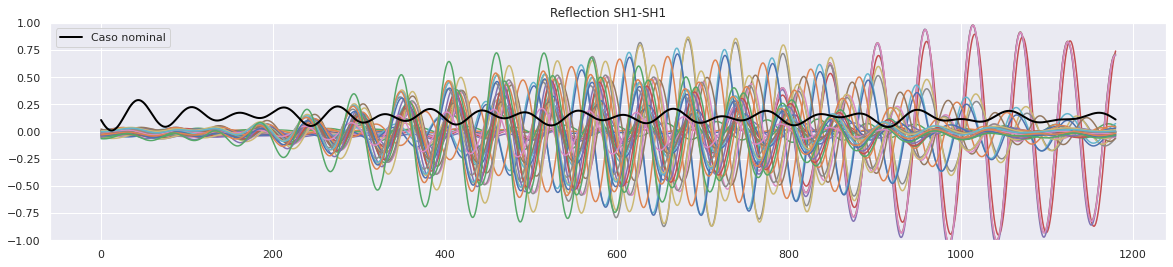

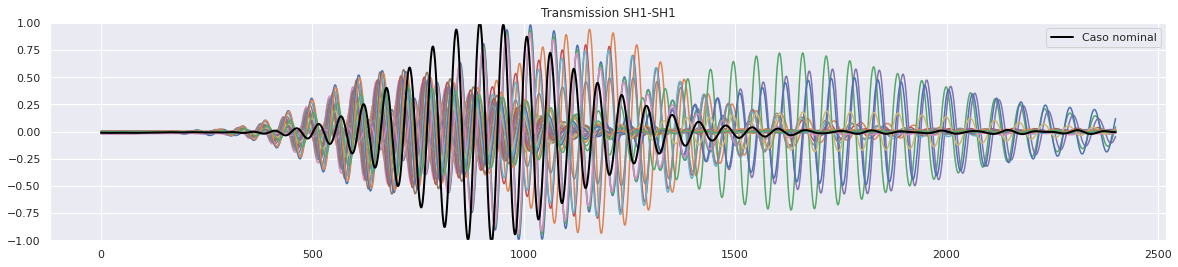

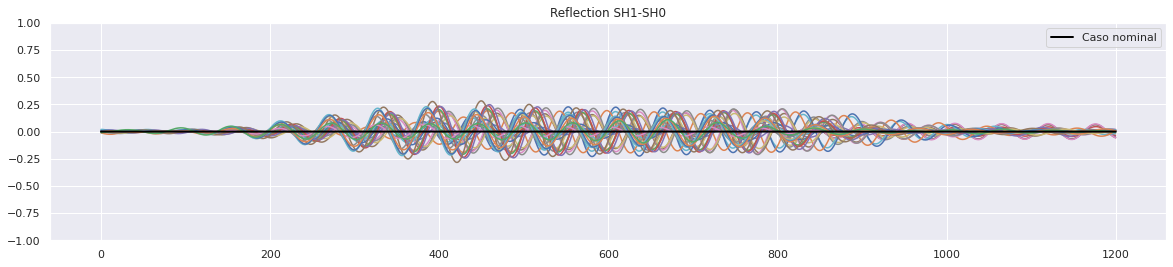

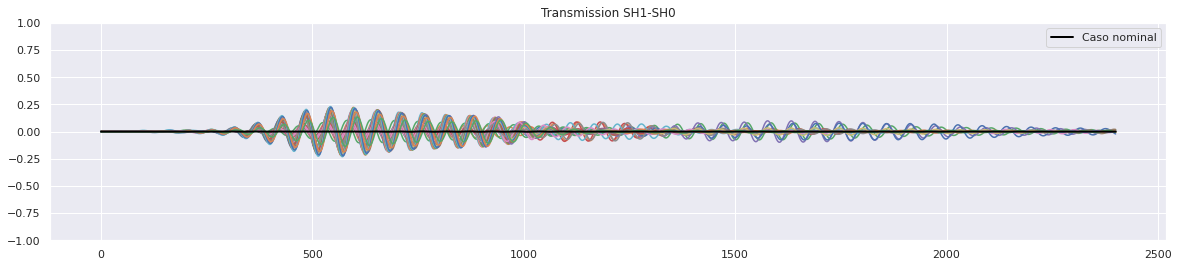

In [ ]:
fig = plt.figure(figsize=(20,4))
for i in range(1,34):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P1_exp[i]);plt.title('Reflection SH0-SH0');
plt.plot(P1_exp[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,34):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P2_exp[i]);plt.title('Transmission SH0-SH0');
plt.plot(P2_exp[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,34):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P3_exp[i]);plt.title('Reflection SH0-SH1')
plt.plot(P3_exp[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,34):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P4_exp[i]);plt.title('Transmission SH0-SH1')
plt.plot(P4_exp[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,34):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P5_exp[i]);plt.title('Reflection SH1-SH1')
plt.plot(P5_exp[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,34):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P6_exp[i]);plt.title('Transmission SH1-SH1')
plt.plot(P6_exp[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,34):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P7_exp[i]);plt.title('Reflection SH1-SH0')
plt.plot(P7_exp[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()
fig = plt.figure(figsize=(20,4))
for i in range(1,34):
  axes = plt.gca();axes.set_ylim([-1,1])
  plt.plot(P8_exp[i]);plt.title('Transmission SH1-SH0')
plt.plot(P8_exp[0],color='black',label='Caso nominal',linewidth=2)
plt.legend()

In [ ]:
TOC()


Toc: start time not set

